<a href="https://colab.research.google.com/github/vipin-jangra/face-age-estimation-CNN/blob/main/Utk_Dataset_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from zipfile import ZipFile
import shutil
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Unzipping the dataset file combined_faces.zip

faces_zip_path = "/content/drive/MyDrive/Dataset/Dataset2/crop_part1.zip";

with ZipFile(faces_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping faces.zip')

Done unzipping faces.zip


In [8]:
# Define age ranges
age_ranges = [(1, 2), (3, 9), (10, 20), (21, 27), (28, 45), (46, 65), (66, 116)]

In [9]:
def categorize_age(age):
    for range_name, (start, end) in enumerate(age_ranges):
        if start <= age <= end:
            return range_name
    return None

In [10]:
dataset_dir = '/content/crop_part1'
# Get the list of all image file paths

image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir) if fname.endswith('.jpg')]
print(f"Images shape: {len(image_paths)}")

Images shape: 9780


In [11]:
dataset_path = '/content/crop_part1'  # Change this to your dataset folder
# Extract age labels from filenames
ages = [int(fname.split('_')[0]) for fname in os.listdir(dataset_path) if fname.endswith('.jpg')]
print(f"Ages shape: {len(ages)}")

Ages shape: 9780


In [12]:
# Categorize ages into ranges
age_categories = [categorize_age(age) for age in ages]

In [13]:
import collections
# Function to print the distribution of age ranges
def print_age_distribution(labels, dataset_type):
    counter = collections.Counter(labels)
    print(f"{dataset_type} Age Distribution:")
    for age_range, count in counter.items():
        print(f"Age range {age_range}: {count} samples")

In [20]:


def preprocess_and_split_dataset(dataset_path, output_path, resize_dim=(224, 224), test_size=0.2):
    # Create output directories for training and testing
    train_dir = os.path.join(output_path, 'train')
    test_dir = os.path.join(output_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)


    # Preprocess and resize images
    processed_images = []
    for img_path in image_paths:
        try:
            img = Image.open(img_path)  # Open the image
            img = img.convert('L')  # Convert to grayscale
            img = img.resize(resize_dim)  # Resize image
            processed_images.append((img, os.path.basename(img_path)))  # Store processed image and filename
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    # Split the dataset into training and testing sets
    train_images, test_images, train_labels, test_labels = train_test_split(
        image_paths, ages,stratify=age_categories, test_size=test_size, random_state=42
    )

        # Print distribution for training set
    print_age_distribution(train_labels, "Training")

    # Print distribution for validation set
    print_age_distribution(test_labels, "Validation")

    # Save training images and create train CSV
    train_data = []
    for img_path, label in zip(train_images, ages):
        try:
            img = Image.open(img_path)  # Open the image
            img = img.convert('L')  # Convert to grayscale
            img = img.resize(resize_dim)  # Resize image
            img.save(os.path.join(train_dir, os.path.basename(img_path)))  # Save image to train folder
            train_data.append({'filepath': os.path.join(train_dir, os.path.basename(img_path)), 'age': label})  # Full path
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    train_df = pd.DataFrame(train_data)
    train_df.to_csv(os.path.join(output_path, 'train_labels.csv'), index=False)

    # Save testing images and create test CSV
    test_data = []
    for img_path, label in zip(test_images, test_labels):
        try:
            img = Image.open(img_path)  # Open the image
            img = img.convert('L')  # Convert to grayscale
            img = img.resize(resize_dim)  # Resize image
            img.save(os.path.join(test_dir, os.path.basename(img_path)))  # Save image to test folder
            test_data.append({'filepath': os.path.join(test_dir, os.path.basename(img_path)), 'age': label})  # Full path
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    test_df = pd.DataFrame(test_data)
    test_df.to_csv(os.path.join(output_path, 'test_labels.csv'), index=False)


    print(f"Dataset processed and split into '{train_dir}' and '{test_dir}' with labels saved as CSV.")




# Example usage

output_path = '/content/UTKDataset'   # Change this to your output folder
preprocess_and_split_dataset(dataset_path, output_path)


Training Age Distribution:
Age range 85: 105 samples
Age range 5: 140 samples
Age range 63: 39 samples
Age range 13: 58 samples
Age range 32: 114 samples
Age range 1: 897 samples
Age range 22: 109 samples
Age range 25: 129 samples
Age range 2: 373 samples
Age range 40: 69 samples
Age range 72: 56 samples
Age range 53: 112 samples
Age range 27: 101 samples
Age range 24: 156 samples
Age range 4: 208 samples
Age range 14: 109 samples
Age range 78: 25 samples
Age range 62: 59 samples
Age range 3: 225 samples
Age range 31: 67 samples
Age range 21: 106 samples
Age range 52: 104 samples
Age range 71: 17 samples
Age range 39: 107 samples
Age range 80: 59 samples
Age range 17: 91 samples
Age range 26: 225 samples
Age range 75: 76 samples
Age range 68: 44 samples
Age range 66: 44 samples
Age range 15: 114 samples
Age range 47: 59 samples
Age range 41: 47 samples
Age range 29: 118 samples
Age range 59: 49 samples
Age range 44: 26 samples
Age range 9: 124 samples
Age range 48: 54 samples
Age range

In [21]:
def count_images_by_age_category(folder_path, labels_csv):
    # Read the labels from CSV
    df = pd.read_csv(labels_csv)

    # Initialize a counter for each age category
    age_category_count = [0] * len(age_ranges)

    # Count images according to age categories
    for _, row in df.iterrows():
        age_category = categorize_age(row['age'])
        if age_category is not None:
            age_category_count[age_category] += 1

    return age_category_count

In [22]:
# Example usage
output_path = '/content/UTKDataset'  # Change this to your output folder path

# Count images in training set
train_labels_csv = os.path.join(output_path, 'train_labels.csv')
train_age_counts = count_images_by_age_category(os.path.join(output_path, 'train'), train_labels_csv)

# Count images in testing set
test_labels_csv = os.path.join(output_path, 'test_labels.csv')
test_age_counts = count_images_by_age_category(os.path.join(output_path, 'test'), test_labels_csv)


In [23]:
# Print the results
print("Training Age Category Counts:", train_age_counts)
print("Testing Age Category Counts:", test_age_counts)

Training Age Category Counts: [1260, 1070, 1054, 885, 1393, 1378, 784]
Testing Age Category Counts: [317, 272, 264, 224, 342, 337, 200]


In [24]:
# Optionally, you can print out the counts in a more readable format
for idx, (start, end) in enumerate(age_ranges):
    print(f"Age {start}-{end}: Train: {train_age_counts[idx]}, Test: {test_age_counts[idx]}")

Age 1-2: Train: 1260, Test: 317
Age 3-9: Train: 1070, Test: 272
Age 10-20: Train: 1054, Test: 264
Age 21-27: Train: 885, Test: 224
Age 28-45: Train: 1393, Test: 342
Age 46-65: Train: 1378, Test: 337
Age 66-116: Train: 784, Test: 200


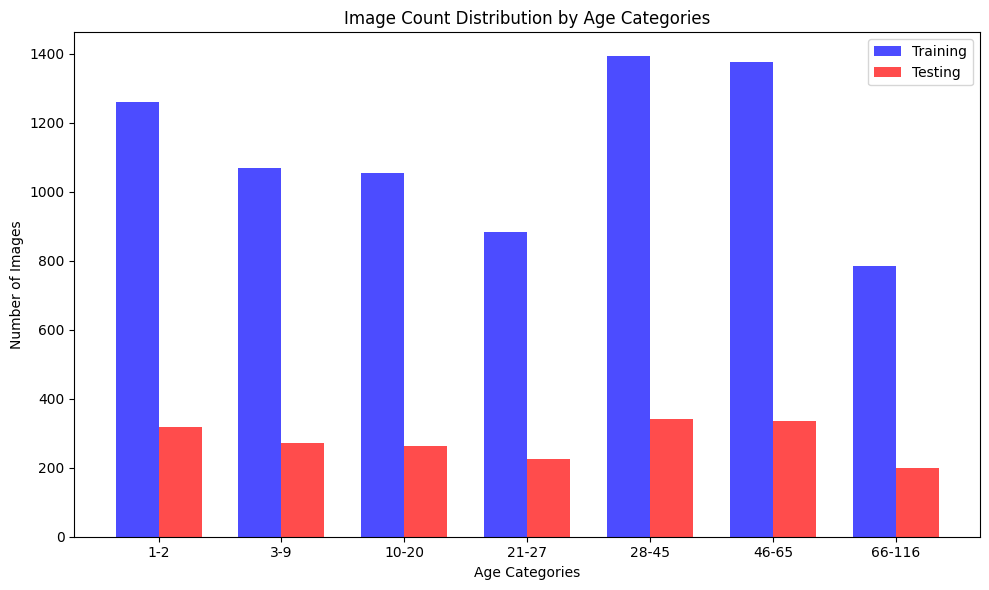

In [26]:
import matplotlib.pyplot as plt

# Function to plot age category distribution
def plot_age_category_distribution(train_counts, test_counts):
    # Define age range labels for plotting
    age_labels = [f"{start}-{end}" for start, end in age_ranges]

    # Set the bar width
    bar_width = 0.35

    # Define the x-axis positions
    x = range(len(age_labels))

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(x, train_counts, width=bar_width, label='Training', color='b', alpha=0.7)
    plt.bar([p + bar_width for p in x], test_counts, width=bar_width, label='Testing', color='r', alpha=0.7)

    # Adding labels and title
    plt.xlabel('Age Categories')
    plt.ylabel('Number of Images')
    plt.title('Image Count Distribution by Age Categories')
    plt.xticks([p + bar_width / 2 for p in x], age_labels)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_age_category_distribution(train_age_counts, test_age_counts)


In [25]:
import shutil

# Path to the output folder where 'train' and 'test' directories are created
output_path = '/content/UTKDataset'  # Change this to your output folder path
shutil.make_archive(output_path, 'zip', output_path)

from google.colab import files
files.download(output_path + '.zip')  # Download the zip file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>